<a href="https://colab.research.google.com/github/kishore9096/Projects/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Read the data file
df = pd.read_csv("/content/drive/MyDrive/Data Analysis/gld_price_data.csv")

In [ ]:
# Basic Information about the data

In [ ]:
df.head(2)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491


In [ ]:
df.tail(2)

,Date,SPX,GLD,USO,SLV,EUR/USD
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
df.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


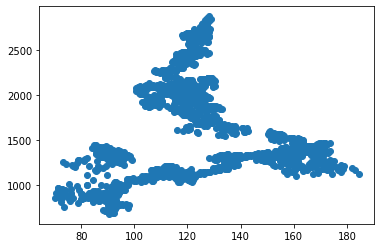

In [ ]:
plt.scatter(x="GLD",y="SPX",data=df)

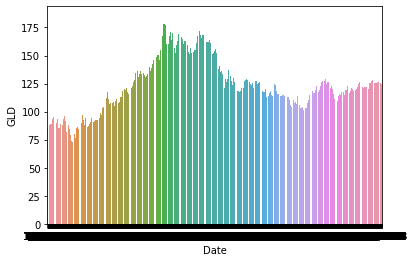

In [ ]:
sns.barplot(x="Date",y="GLD",data=df)

In [ ]:
cor = df.corr()
df.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


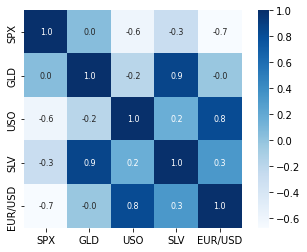

In [ ]:
sns.heatmap(cor,cbar = True, square =True, fmt = ".1f", annot = True, annot_kws = {'size':8}, cmap = "Blues") 

# SLV is postively correlated with Gold

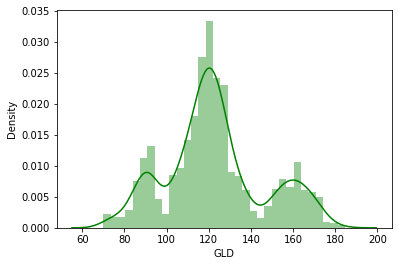

In [ ]:
sns.distplot(df["GLD"],color="green")   # Most of the times the prices lie's near 120

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


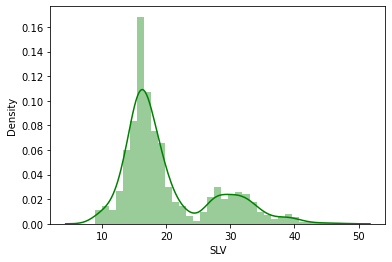

In [ ]:
sns.distplot(df["SLV"],color="green")

# Model building

In [ ]:
X = df.drop(["Date","GLD"],axis=1)
y = df["GLD"]

In [ ]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 4)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1832, 4), (458, 4), (1832,), (458,))

In [ ]:
# Random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rf_p = rfr.predict(X_test)
metrics.r2_score(y_test,rf_p)

0.9902554042576734

In [ ]:
# The error is more, but we are dealing with data which is in 100 and 1000 so this error is good
# Lets validate this

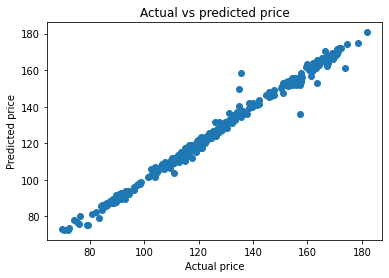

In [ ]:

plt.scatter(y_test,rf_p)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual vs predicted price")       # The model is accurate because the points are almost near
plt.show() 

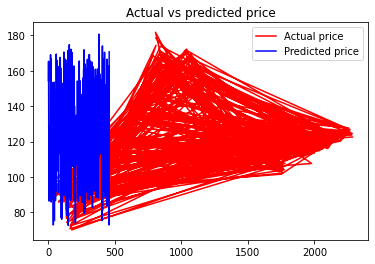

In [ ]:
# Visualize the error

plt.plot(y_test,color="red",label="Actual price")
plt.plot(rf_p,color="blue",label="Predicted price")

#plt.xlabel("Actual price")
#plt.ylabel("Predicted price")
plt.title("Actual vs predicted price")
plt.legend()       # The model is accurate because the points are almost near
plt.show()